<a href="https://colab.research.google.com/github/Varshhadinesh15/TNSDC-Gen-AI/blob/main/HANDWRITTEN_DIGIT_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


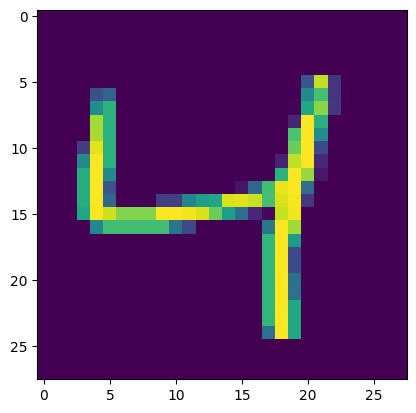

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2867 - accuracy: 0.9186 - val_loss: 0.1608 - val_accuracy: 0.9534
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1277 - accuracy: 0.9630 - val_loss: 0.1131 - val_accuracy: 0.9683
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0885 - accuracy: 0.9735 - val_loss: 0.1181 - val_accuracy: 0.9629
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0665 - accuracy: 0.9796 - val_loss: 0.0875 - val_accuracy: 0.9732
Epoch 5/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.0886 - val_accuracy: 0.9752
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0919 - val_accuracy: 0.9731
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 0.0936 - val_accuracy:

In [12]:
y_pb = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [13]:
y_pd = y_pb.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pd)

0.9785

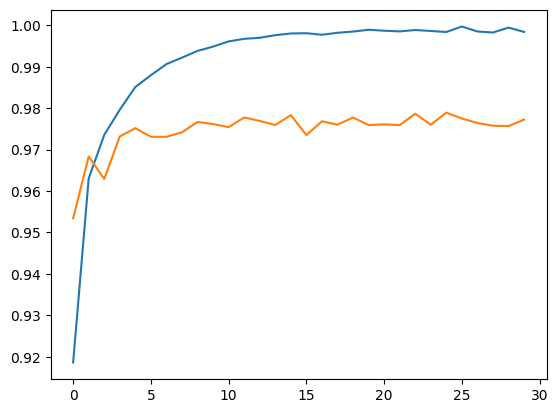

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

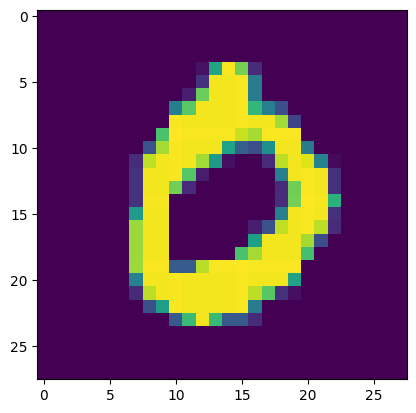

In [16]:
plt.imshow(X_test[3])

In [17]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([0])

In [18]:
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_values = test.values

In [19]:
print(test_values.shape)
print(X_test.shape)

(28000, 784)
(10000, 28, 28)


In [20]:
test_values_reshaped = test_values.reshape(28000, 28, 28)
test_values_reshaped.shape

(28000, 28, 28)

In [21]:
test_out = model.predict(test_values_reshaped)

875/875 [==============================] - 2s 2ms/step


In [22]:
y =test_out.argmax(axis=1)
submission = pd.DataFrame(y, columns=['Label'])
submission.index.name = 'ImageId'
submission.index += 1
submission.to_csv('/kaggle/working/submission.csv')
print('Submission completed!')

Submission completed!
